In [9]:
#Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Training set and Testing Set 
from sklearn.model_selection import train_test_split
# Import Training Model
from sklearn.linear_model import LinearRegression

In [53]:
#import data 

df=pd.read_csv('auto-mpg.csv')
#name not reqd so drop

df = df.drop('car name', axis = 1)
df.shape

(398, 8)

In [54]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [8]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
303,31.8,4,85.0,65,2020,19.2,79,3,datsun 210
199,20.0,6,225.0,100,3651,17.7,76,1,dodge aspen se
106,12.0,8,350.0,180,4499,12.5,73,1,oldsmobile vista cruiser
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340
107,18.0,6,232.0,100,2789,15.0,73,1,amc gremlin
280,21.5,6,231.0,115,3245,15.4,79,1,pontiac lemans v6
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
127,19.0,6,232.0,100,2901,16.0,74,1,amc hornet
225,17.5,6,250.0,110,3520,16.4,77,1,chevrolet concours
349,34.1,4,91.0,68,1985,16.0,81,3,mazda glc 4


In [80]:
#replace origin with category names 

df['origin'] = df['origin'].replace({1:'america',2:"europe",3:"asia"})
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
41,14.0,8,318.0,150.0,4096,13.0,71,america
352,29.9,4,98.0,65.0,2380,20.7,81,america
23,26.0,4,121.0,113.0,2234,12.5,70,europe
83,28.0,4,98.0,80.0,2164,15.0,72,america
229,16.0,8,400.0,180.0,4220,11.1,77,america
46,22.0,4,140.0,72.0,2408,19.0,71,america
278,31.5,4,89.0,71.0,1990,14.9,78,europe
114,26.0,4,98.0,90.0,2265,15.5,73,europe
15,22.0,6,198.0,95.0,2833,15.5,70,america
324,40.8,4,85.0,65.0,2110,19.2,80,asia


In [81]:
#Create Dummy Variables for origin
df = pd.get_dummies(df, columns=['origin'])
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
237,30.5,4,98.0,63.0,2051,17.0,77,1,0,0
288,18.2,8,318.0,135.0,3830,15.2,79,1,0,0
269,30.9,4,105.0,75.0,2230,14.5,78,1,0,0
103,11.0,8,400.0,150.0,4997,14.0,73,1,0,0
76,18.0,4,121.0,112.0,2933,14.5,72,0,0,1
152,19.0,6,225.0,95.0,3264,16.0,75,1,0,0
84,27.0,4,97.0,88.0,2100,16.5,72,0,1,0
181,33.0,4,91.0,53.0,1795,17.5,75,0,1,0
35,17.0,6,250.0,100.0,3329,15.5,71,1,0,0
197,29.0,4,90.0,70.0,1937,14.2,76,0,0,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


In [46]:
df.describe()
#missing horsepower, its in object state so some are non numeric

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [83]:
#deal with missingvalues for horsepower 
#isdigit check numeric or string
hpIsDight = pd.DataFrame(df['horsepower'].str.isdigit())
#Total Missing Values is 6 

df[hpIsDight['horsepower']==False]


AttributeError: Can only use .str accessor with string values!

In [84]:
# replace all ? with nan
df = df.replace('?', np.nan)

In [61]:
# Replace with Median Values 
df.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [85]:
print('Total Nan values in horsepower', df['horsepower'].isna().sum())

medianFiller = lambda x: x.fillna(x.median())
df = df.apply(medianFiller,axis = 0)
df['horsepower'] = df['horsepower'].astype('float64')

Total Nan values in horsepower 0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


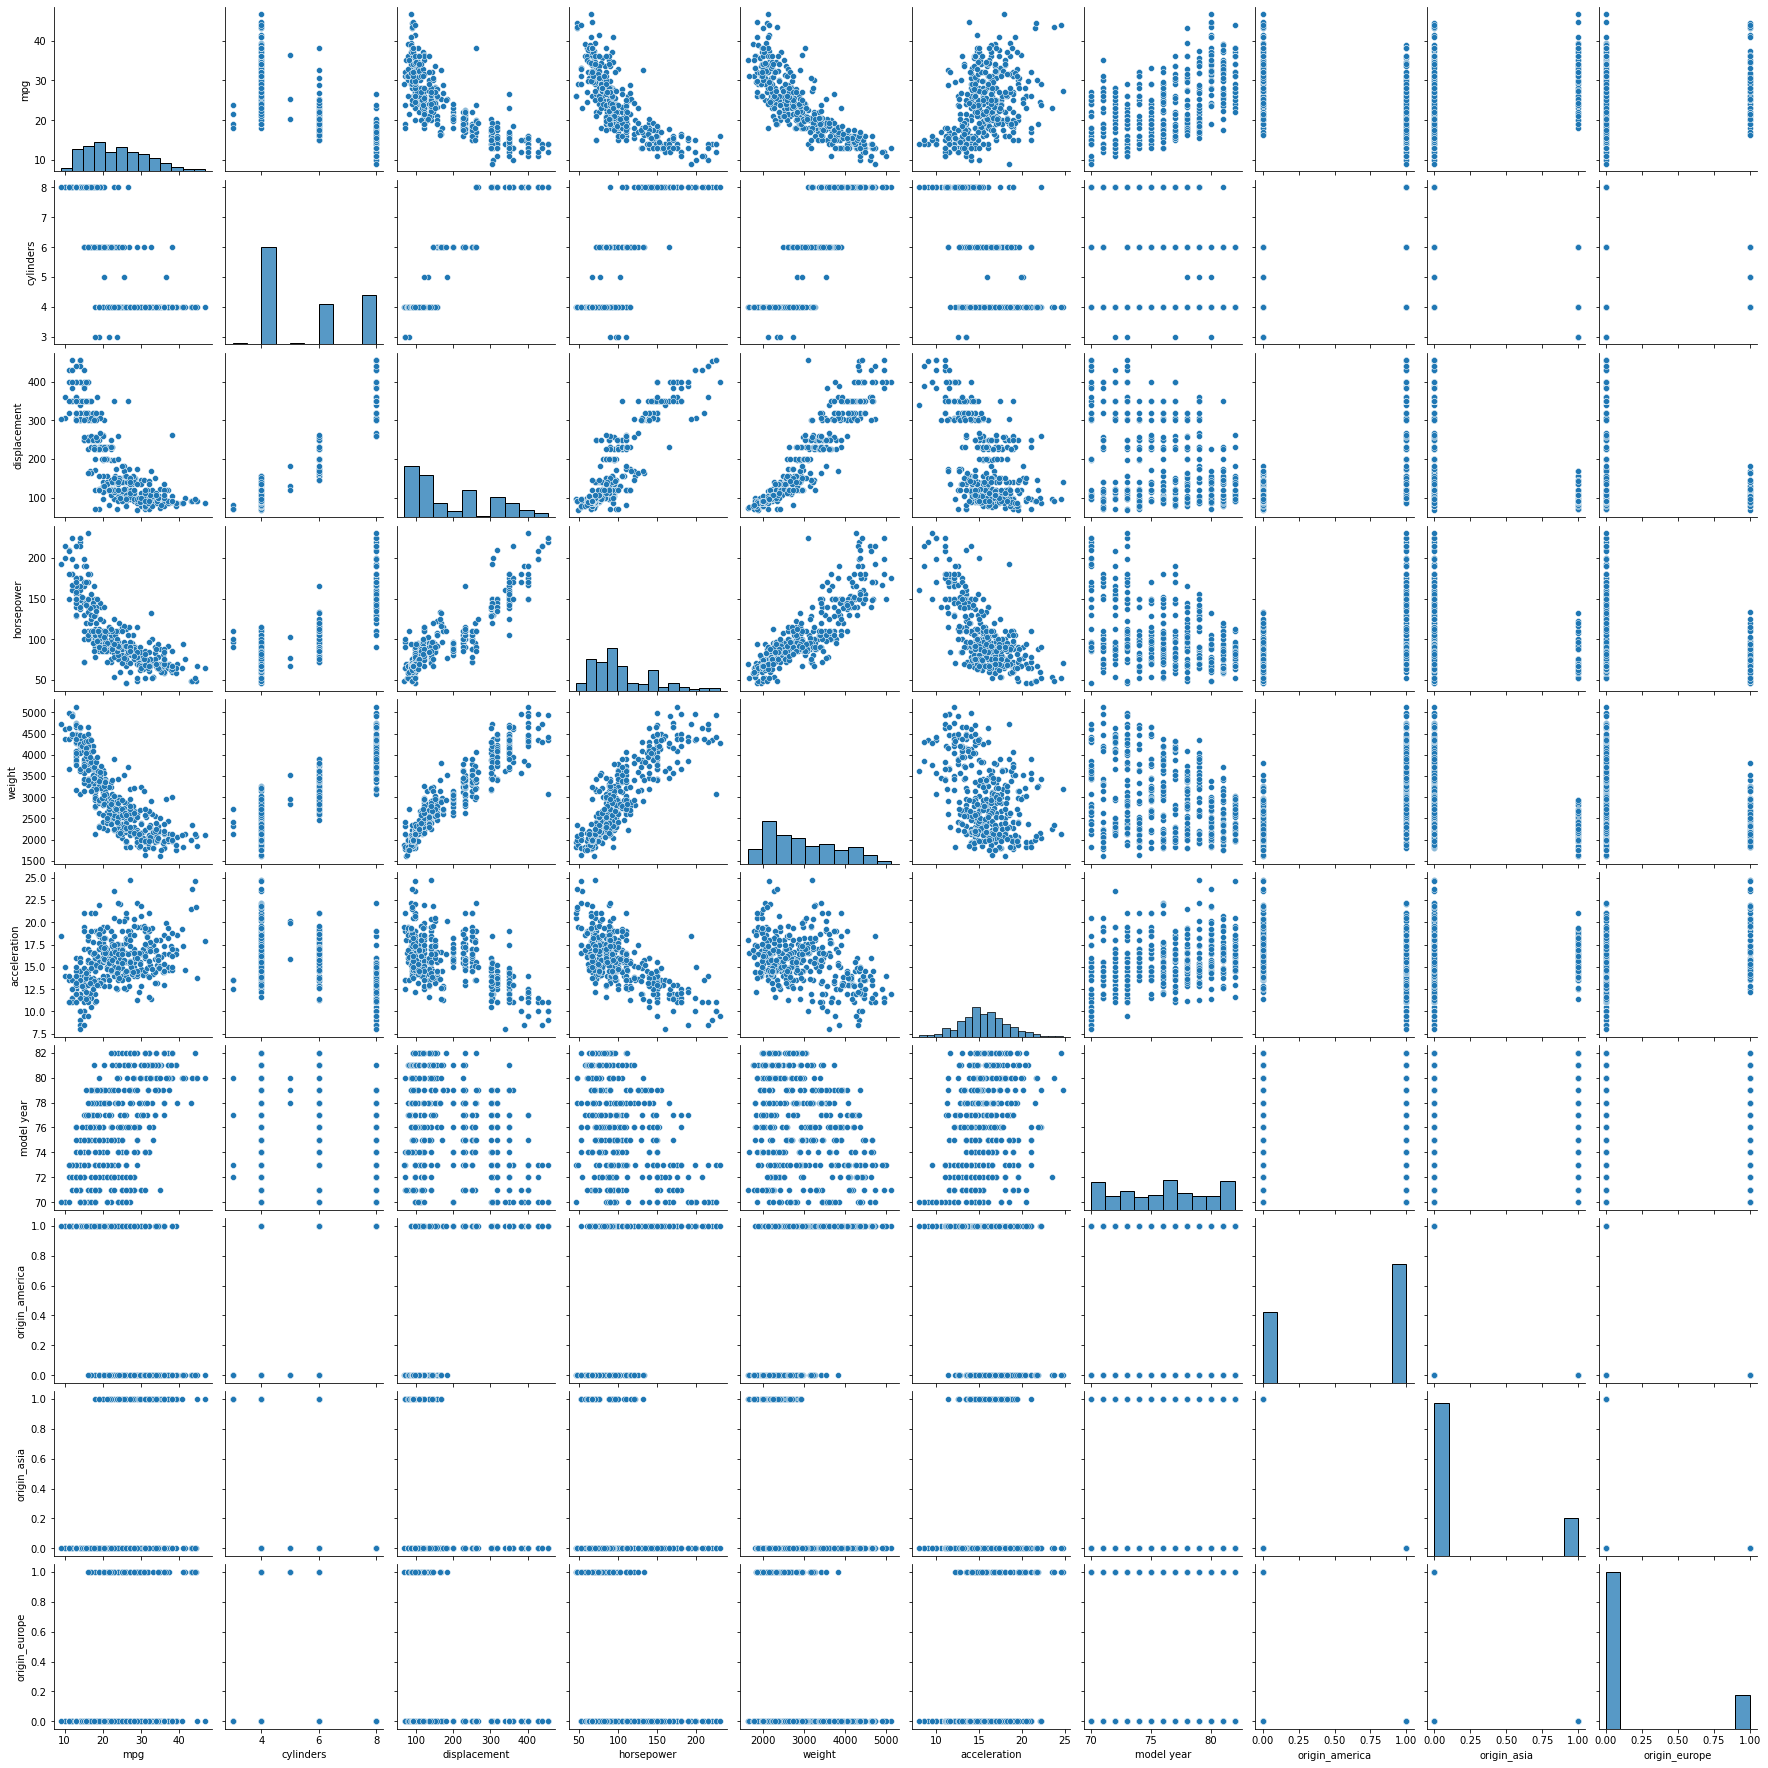

In [87]:
sns.pairplot(df)

In [88]:
df.corr().T

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,-0.568192,0.442174,0.259022
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,0.604351,-0.396479,-0.352861
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,0.651407,-0.433505,-0.373886
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,0.485418,-0.318972,-0.282877
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,0.598398,-0.440817,-0.298843
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,-0.250806,0.109144,0.204473
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.139883,0.193101,-0.024489
origin_america,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,1.000000,-0.643317,-0.597198
origin_asia,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.643317,1.000000,-0.229895
origin_europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,-0.597198,-0.229895,1.000000


In [96]:
#setup and split data 
#drop mpg and origin_europe
X=df.drop(['mpg','origin_europe'],axis=1)
y=df['mpg']

In [97]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [98]:
#Build Model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [99]:
#r^2 value
lm.score(X_train,y_train)

0.8141025501610559

In [100]:
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=["CoEff"])
cdf

,CoEff
cylinders,-0.394808
displacement,0.028946
horsepower,-0.021752
weight,-0.007352
acceleration,0.061919
model year,0.836934
origin_america,-3.001283
origin_asia,-0.606018


In [101]:
lm.intercept_

-18.28345111637211

In [102]:
#r^2 value on training - 81%
lm.score(X_train,y_train)

0.8141025501610559

In [103]:
#r^2 value on test - 84%
lm.score(X_test,y_test)

0.8433135132808829

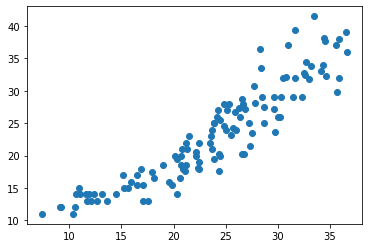

In [104]:
predictions = lm.predict(X_test)
plt.scatter(predictions, y_test)

In [2]:
predictions = lm.predict(X_test)
sns.histplot((y_test-predictions), kde=True)

NameError: name 'lm' is not defined

0.8647441061366246

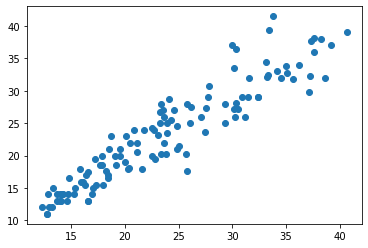